# California Housing

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score, confusion_matrix
from pickle import dump


## Import data

In [2]:
# Url with data
url = "https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv"

# Convert to DataFrame
total_data = pd.read_csv(url, sep = ",")

#Save data
total_data.to_csv("/workspaces/ml_means/data/raw/housing.csv", index = False)

In [3]:
total_data.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [4]:
# Dropping columns to keep only the predictors we are interested in
total_data.drop(['HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'MedHouseVal'], axis = 1, inplace = True)

In [5]:
total_data.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [6]:
# Dividing Dataset into Train and test
X = total_data

X_train, X_test = train_test_split(X, test_size = 0.2, random_state = 24)

## K-Means

In [7]:
# Creating a KMeans model classifying the data into 6 clusters
model = KMeans(n_clusters = 6, random_state = 24)
model.fit(X_train)

# Save model
dump(model, open("/workspaces/ml_means/models/K_means_model.pk", "wb"))

/home/vscode/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [8]:
# Predict cluster train
cluster_train = model.predict(X_train)

# Add predicted Cluster into train set
X_train["Cluster"] = cluster_train


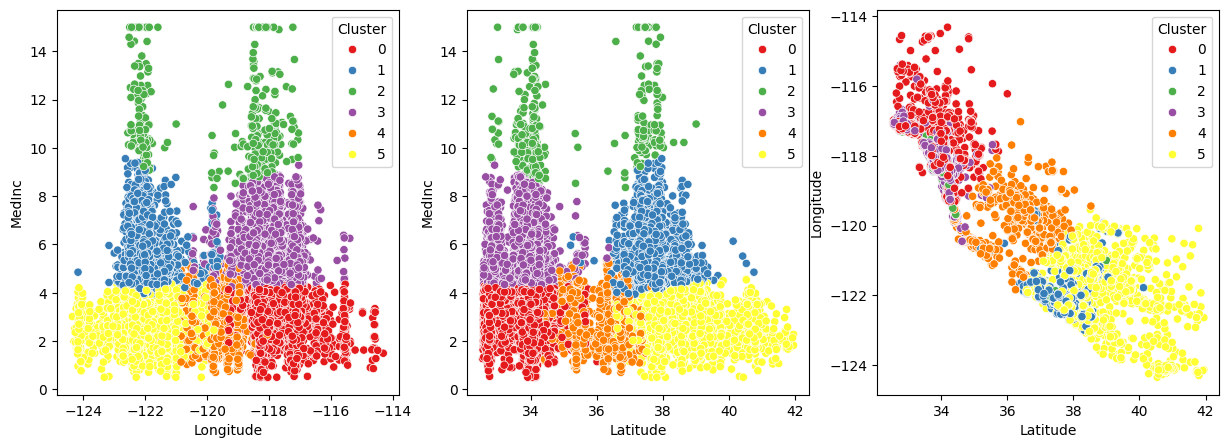

In [9]:
# Plot cluster's
fig, axis = plt.subplots(1, 3, figsize = (15,5))

sns.scatterplot(ax = axis[0], data = X_train, x = 'Longitude', y = 'MedInc', hue = 'Cluster', palette='Set1')
sns.scatterplot(ax = axis[1], data = X_train, x = 'Latitude', y = 'MedInc', hue = 'Cluster', palette='Set1')
sns.scatterplot(ax = axis[2], data = X_train, x = 'Latitude', y = 'Longitude', hue = 'Cluster', palette='Set1')

plt.show()

In [10]:
# Predict cluster test
cluster_test = model.predict(X_test)

# Add predicted Cluster into test set
X_test["Cluster"] = cluster_test

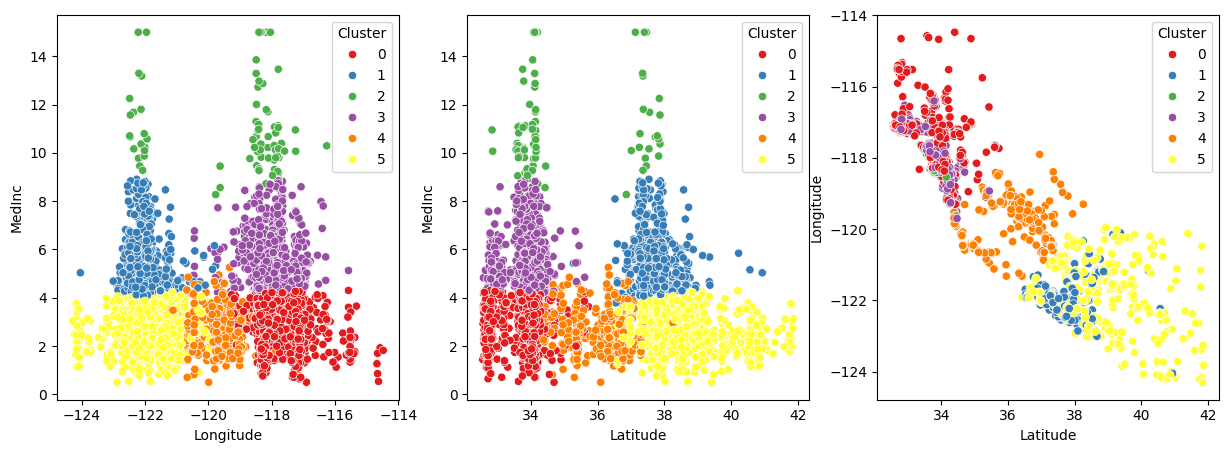

In [11]:
# Plot cluster's
fig, axis = plt.subplots(1, 3, figsize = (15,5))

sns.scatterplot(ax = axis[0], data = X_test, x = 'Longitude', y = 'MedInc', hue = 'Cluster', palette='Set1')
sns.scatterplot(ax = axis[1], data = X_test, x = 'Latitude', y = 'MedInc', hue = 'Cluster', palette='Set1')
sns.scatterplot(ax = axis[2], data = X_test, x = 'Latitude', y = 'Longitude', hue = 'Cluster', palette='Set1')

plt.show()

### Comparing Train and Test

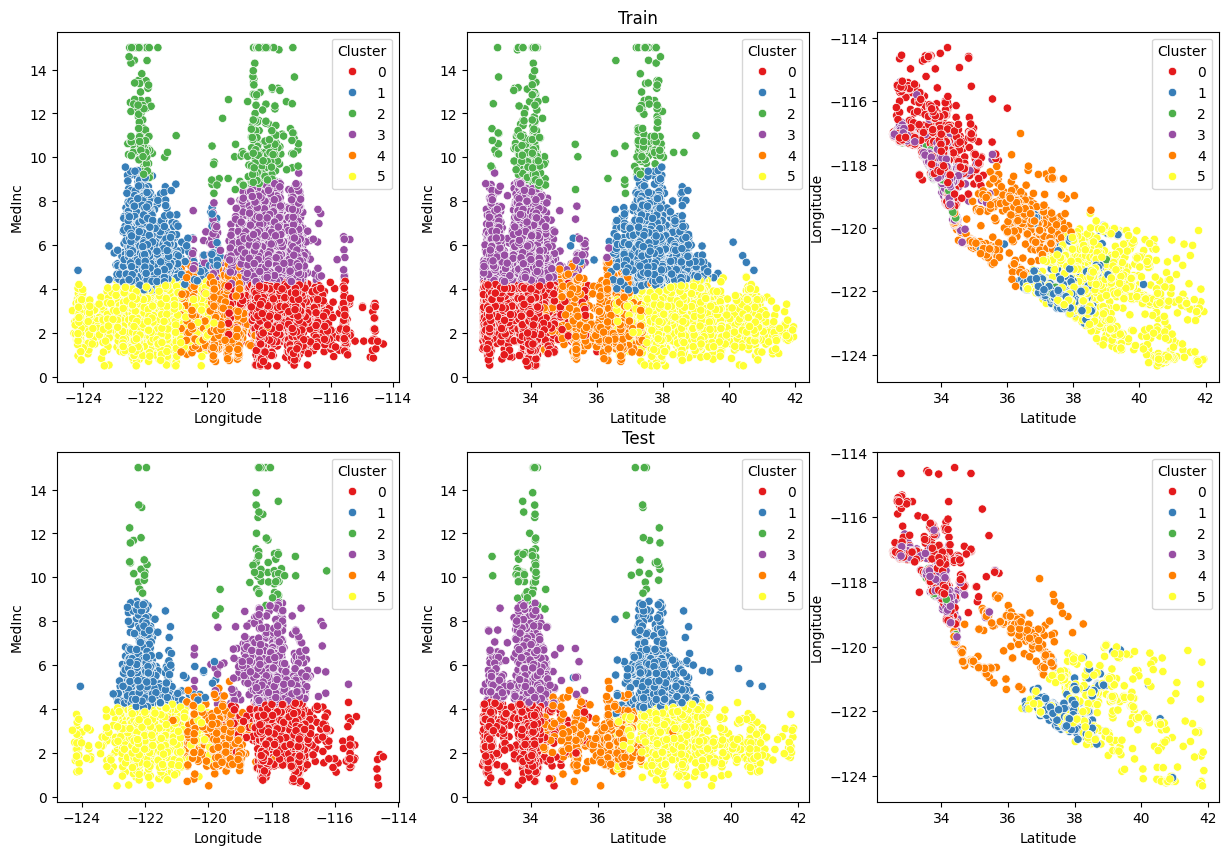

In [12]:
# Plot all cluster's
fig, axis = plt.subplots(2,3, figsize = (15,10))

sns.scatterplot(ax = axis[0,0], data = X_train, x = 'Longitude', y = 'MedInc', hue = 'Cluster', palette='Set1')
sns.scatterplot(ax = axis[0,1], data = X_train, x = 'Latitude', y = 'MedInc', hue = 'Cluster', palette='Set1')
sns.scatterplot(ax = axis[0,2], data = X_train, x = 'Latitude', y = 'Longitude', hue = 'Cluster', palette='Set1')
sns.scatterplot(ax = axis[1,0], data = X_test, x = 'Longitude', y = 'MedInc', hue = 'Cluster', palette='Set1')
sns.scatterplot(ax = axis[1,1], data = X_test, x = 'Latitude', y = 'MedInc', hue = 'Cluster', palette='Set1')
sns.scatterplot(ax = axis[1,2], data = X_test, x = 'Latitude', y = 'Longitude', hue = 'Cluster', palette='Set1')

axis[0, 1].set_title('Train')
axis[1, 1].set_title('Test')

plt.show()

We can observe that when comparing the Train and Test plots, the clustering structure remains consistent.

## KNN

In [13]:
# Separated Target variable from X_train
y_train = X_train["Cluster"]
X_train.drop("Cluster", axis=1, inplace = True)

# Separated Target variable from X_test
y_test = X_test["Cluster"]
X_test.drop("Cluster", axis=1, inplace = True)

# Save data

X_train.to_csv("/workspaces/ml_means/data/processed/x_train.csv", index = False)
y_train.to_csv("/workspaces/ml_means/data/processed/y_train.csv", index = False)

X_test.to_csv("/workspaces/ml_means/data/processed/x_test.csv", index = False)
X_test.to_csv("/workspaces/ml_means/data/processed/y_test.csv", index = False)

In [14]:
# Creating a KNN model
model = KNeighborsClassifier()
model.fit(X_train, y_train)

dump(model, open("/workspaces/ml_means/models/KNN_model.pk", "wb"))

### Train

In [15]:
y_pred_train = model.predict(X_train)
y_pred_train

array([5, 0, 3, ..., 0, 1, 5], dtype=int32)

### Confusion matrix KNN Train

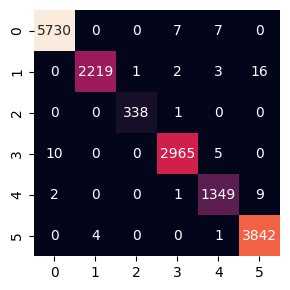

In [16]:
california_cm = confusion_matrix(y_train, y_pred_train)

cm_df = pd.DataFrame(california_cm)

plt.figure(figsize = (3, 3))

sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

### Test

In [17]:
y_pred = model.predict(X_test)
y_pred

array([3, 0, 3, ..., 1, 3, 5], dtype=int32)

### Accuracy Train-Test

In [18]:
print(f"Accuracy train = {accuracy_score(y_train, y_pred_train)}")
print(f"Accuracy test = {accuracy_score(y_test, y_pred)}")

Accuracy train = 0.9958212209302325
Accuracy test = 0.9932170542635659


### Confusion matrix KNN Test

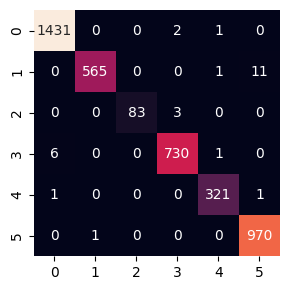

In [19]:
california_cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(california_cm)

plt.figure(figsize = (3, 3))

sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

## Logistic Regression

In [20]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

dump(model, open("/workspaces/ml_means/models/logistic_R_model.pk", "wb"))

/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
y_pred_train = model.predict(X_train)
y_pred_train

array([5, 0, 3, ..., 0, 1, 5], dtype=int32)

### Confusion matrix Logistic Regression Train

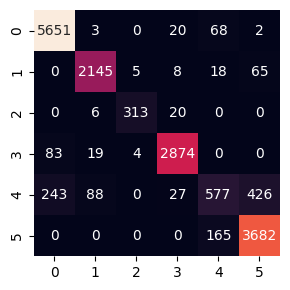

In [22]:
california_cm = confusion_matrix(y_train, y_pred_train)

cm_df = pd.DataFrame(california_cm)

plt.figure(figsize = (3, 3))

sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

In [23]:
y_pred = model.predict(X_test)
y_pred

array([3, 1, 3, ..., 1, 3, 5], dtype=int32)

### Confusion matrix Logistic Regression Test

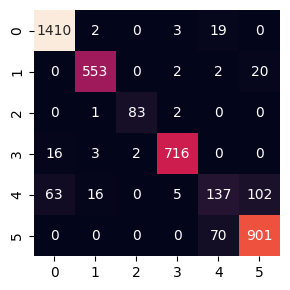

In [24]:
california_cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(california_cm)

plt.figure(figsize = (3, 3))

sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

### Accuracy Train-Test

In [25]:
print(f"Accuracy train = {accuracy_score(y_train, y_pred_train)}")
print(f"Accuracy test = {accuracy_score(y_test, y_pred)}")

Accuracy train = 0.9230862403100775
Accuracy test = 0.9205426356589147


## Conclusion

The K-Means model has provided us with a clustering structure that can be useful in understanding the data distribution. After comparing the results with supervised models such as KNN and Logistic Regression, it is concluded that the KNN model has demonstrated superior performance in terms of accuracy. It achieved a 99.58% accuracy on the training set and a 99.32% accuracy on the test set, indicating a superior ability to predict labels compared to the other evaluated models. The clustering structure generated by K-Means offers insights into the data's inherent structure, although KNN outperformed in terms of predictive accuracy, suggesting its stronger suitability for this specific classification task
